<h1 align='center'>Product Reviews Analysis</h1>
<h2 align='center'>Machine Learning Project</h2>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv Parrot-htb-5.1.1_amd64.iso drive/MyDrive/

# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Reading DataSet

In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/Reviews.csv')
data = pd.read_csv('drive/MyDrive/Dataset/data.csv')
data_t = data['content']
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.shape

(568454, 10)

# Handling Missing Values

In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum().sum()

0

# Duplicate Values Handling

In [ ]:
df = df.drop_duplicates(keep='first')


# Droping Columns

In [ ]:
df = df[['Score','Summary','Text']].copy()

In [ ]:
df.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


# Classfying Scores
Classify score **>3** as **positive(1)** and else **negative(0)**.

In [ ]:
df.Score.value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [ ]:
df['Category'] = df['Score'].apply(lambda x : 'positive' if x >=3 else 'negative')

In [ ]:
df.Category.value_counts()

positive    486404
negative     82007
Name: Category, dtype: int64

In [ ]:
df.head()

,Score,Summary,Text,Category
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,2,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,Great taffy,Great taffy at a great price. There was a wid...,positive


# ploting Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


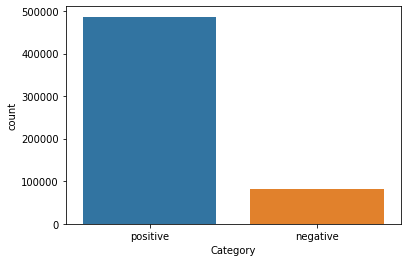

In [ ]:
sns.countplot(df['Category'],data=df)

# Balancing DataSet

In [ ]:
df_grouped_by = df.groupby(['Category'])
df1 = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df1 = df1.droplevel(['Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


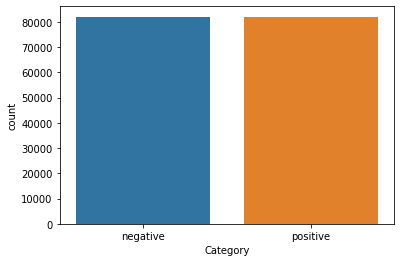

In [ ]:
sns.countplot(df1['Category'],data=df1)

In [ ]:
df1.shape

(164014, 4)

# Splitting the data (only 'Text' , 'Score' and 'Category' columns) into train and test data:

In [ ]:
split = df1[["Text" , "Score" , "Category"]]
train=split.sample(frac=0.8,random_state=50)
test=split.drop(train.index)


In [ ]:
train.head()

,Text,Score,Category
40426,Can't live without peanut butter and now I don...,5,positive
56708,My son loves all of the Happy Baby meals he's ...,1,negative
25905,I have purchased these potato guns/spud shoote...,1,negative
77716,"Dont buy the hype, fulvic acid has not been pr...",1,negative
64056,I was surprised how large the tub actually was...,5,positive


In [ ]:
test.head()

,Text,Score,Category
9,The flexi bone basically turned to rubble afte...,2,negative
31,"A short while ago, my doctor looked me in the ...",2,negative
47,I thought the honey was much thinner than any ...,2,negative
62,I dont know if it was suppose to taste like bu...,1,negative
114,"Shipped very quick. However the US Mail ""shoeb...",1,negative


In [ ]:
train["words"] = train["Text"].str.lower().str.split()
train

,Text,Score,Category,words
40426,Can't live without peanut butter and now I don...,5,positive,"[can't, live, without, peanut, butter, and, no..."
56708,My son loves all of the Happy Baby meals he's ...,1,negative,"[my, son, loves, all, of, the, happy, baby, me..."
25905,I have purchased these potato guns/spud shoote...,1,negative,"[i, have, purchased, these, potato, guns/spud,..."
77716,"Dont buy the hype, fulvic acid has not been pr...",1,negative,"[dont, buy, the, hype,, fulvic, acid, has, not..."
64056,I was surprised how large the tub actually was...,5,positive,"[i, was, surprised, how, large, the, tub, actu..."
...,...,...,...,...
68433,The product is awesome but ALL of the cans I g...,2,negative,"[the, product, is, awesome, but, all, of, the,..."
27392,Someone should find a way to SUE me for being ...,1,negative,"[someone, should, find, a, way, to, sue, me, f..."
25741,"Of all the Golazo products, the Mango - Limon ...",5,positive,"[of, all, the, golazo, products,, the, mango, ..."
33474,If you have had fudge it hasn't been this good...,5,positive,"[if, you, have, had, fudge, it, hasn't, been, ..."


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords                   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Tokenizing 

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stop_words = set(stopwords.words('english'))
stop_words.remove("not")

count_vect = CountVectorizer(min_df=2 , stop_words=stop_words , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Text"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(data_t)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


# Fitting LogisticRegression

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , max_iter=1000 , C=1000)
logistic = logreg.fit(X_train_tfidf, train["Category"])
prediction = logreg.predict(X_test_tfidf)
prediction

array(['negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

# Recommended ?

In [ ]:
uni ,count = np.unique(prediction,return_counts=True)
final_Arr = np.array((uni, count)).T

In [ ]:
neg = 0
pos = 0

if final_Arr[0][0] == 'negative':
  neg = final_Arr[0][1]
elif final_Arr[0][0] == 'positive':
  pos = final_Arr[0][1]

if final_Arr[1][0] == 'negative':
  neg = final_Arr[1][1]
elif final_Arr[1][0] == 'positive':
  pos = final_Arr[1][1]



pos_p = (pos/(pos+neg))*100
neg_p = (neg/(pos+neg))*100


In [ ]:
if pos_p > neg_p:
  print("{}% People had good experince with product\n".format(pos_p))
else:
  print("{}% People had bad experince with product\n".format(neg_p))

60.0% People had good experince with product



# Generate Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


matplotlib.rcParams['font.size']=12          
matplotlib.rcParams['savefig.dpi']=100             
matplotlib.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
df_cloud = pd.concat([data['content'],pd.DataFrame(prediction,columns=['Class'])], axis=1)

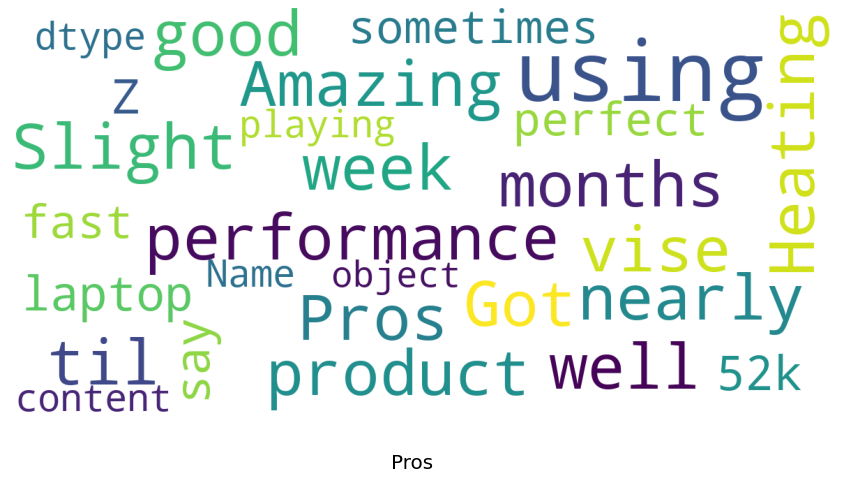

In [ ]:
show_wordcloud(df_cloud['content'][df_cloud['Class'] == 'positive'], title = 'Pros')

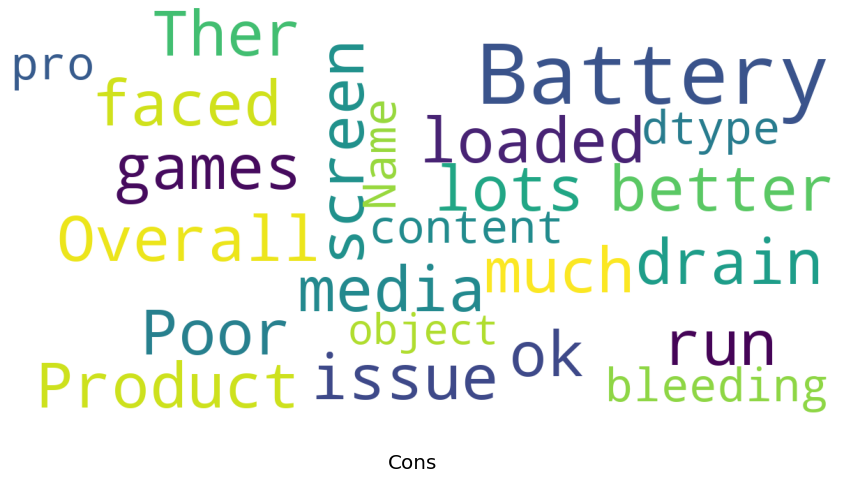

In [ ]:
show_wordcloud(df_cloud['content'][df_cloud['Class'] == 'negative'], title = 'Cons')